# Random Numpy Fun

You're going to have to generate a lot of random numbers in the course and it's a great way to simulate data. Later on, you'll be doing a lot of random shuffling for things like permutation analyses, so it's best we lay the framework here.  When using numpy, the first thing you need to do is to create a random number generator.  For the vast majority of what you'll do, you can use their default generator:
```
import numpy as np
rng = np.random.default_rng()
```

Here, `rng` is your random number generator and you can ask it to make [all sorts of random numbers](https://numpy.org/doc/stable/reference/random/generator.html) for you.  You might say `rng.integers(0,100,10)` for example to make 10 integers from 0-99. Here are a few useful ones to know about:
- [`.integers(low,high,size, ...)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers): Random integers
- [`.random(size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random): Random uniform floats \[0.0,1.0\) 
- [`.normal(loc, scale, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html): Random Gaussian floats with mean=`loc` and std=`scale` 
- [`.shuffle(x)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle), 
[`.permuted(x,axis)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.permuted) and [`.permutation(x)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.permutation): Variants on shuffling the order of items


In the code box below, create: 
- an `A` that has 6 random integers from 0-10
- a `B` that is a 3x2 matrix with drawn from a normal random distribution with mean 0 and standard deviation 1
- a `C` that is a random ordering of the numbers 0-12 (all those numbers, no repetitions)

In [ ]:
import numpy as np
rng = np.random.default_rng()
A = rng.integers(0,10, 6)
B = rng.normal(0,1, (2, 3))
C = rng.permutation(12)

array([ 2,  6,  1, 11,  0,  3,  9, 10,  4,  7,  5,  8])

If you run your code multiple times, you'll find, as expected, that you get different numbers each time.  But, what if you wanted the numbers to be in a _fixed, random_ order?  That's where the notion of a _random number seed_ comes in. When you create a random number generator, you can pass in the _seed_. With the same seed, you'll create the same random sequence.  The sequence is random in that, without knowing anything else, you can't predict the next one. But, if you know the seed, you can. This can be very handy.

Try the code below a few times and watch what happens. The first time all looks random, right?  After that though, `rng1` varies each time, but the other two don't. Note, if you don't pass in a seed, Numpy comes up with, what's effectively a random starting point for you so things are truly random.

In [ ]:
import numpy as np

rng1=np.random.default_rng()
rng2=np.random.default_rng(123)
rng3=np.random.default_rng(456)

print(f'rng1: {rng1.random(5)} and {rng1.random(5)}')
print(f'rng2: {rng2.random(5)} and {rng2.random(5)}')
print(f'rng3: {rng3.random(5)} and {rng3.random(5)}')


# Random numbers in Scipy.stats
Numpy's not the only game in town here and we're going to make good use of **Scipy** in the course here as well. In particular, the `scipy.stats` module has very handy functions for distributions. Want to know the probability density function or cumulative sum for distributions you've never heard of?  `scipy.stats` [is your friend](https://docs.scipy.org/doc/scipy/reference/stats.html) (Note, it's got a lot more than this - plenty of statistical tests in there!). 

In partiuclar, though, all continuous distributions it knows about get [the same host of methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous). Things like `.pdf` and `.cdf` for the probability density function (what's the height of this distribution at point x?) and cumulative distribution function (what's the sum of the distribution at point x?) along with `.mean`, `.median`, `.std`, etc. are all in there. But we also have `.rvs` to generate a random sample from that distribution.

There is a [parallel for discrete distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete) with the most common one you'll use being [`randint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint).

In [10]:
from scipy.stats import norm, uniform  # both of these are continuous
from scipy.stats import randint # Here's a discrete distribution example

print(f'5 random uniform floats from 0-1 {uniform.rvs(size=5)}')
print(f'5 random uniform floats from 10-15 {uniform.rvs(size=5,loc=10,scale=5)}')
print(f'5 random normal floats mean=0, std=1 {norm.rvs(size=5)}')
print(f'5 random normal floats mean=10, std=2 {norm.rvs(size=5,loc=10,scale=2)}')

print(f'5 random integers from 0-10 {randint.rvs(low=0, high=10, size=5)}')


5 random uniform floats from 0-1 [0.35635761 0.62190403 0.95800142 0.23215226 0.03132718]
5 random uniform floats from 10-15 [13.54353148 10.1583261  12.16970459 11.35756725 10.61794246]
5 random normal floats mean=0, std=1 [-0.84604594 -0.25165524 -0.74571563  0.60451151  0.6524964 ]
5 random normal floats mean=10, std=2 [ 6.8004579  10.76276618 11.83582418 10.34628097  7.18403539]
5 random integers from 0-10 [4 6 5 0 1]


In the box below, create a D using `scipy.stats` that is 1000 elements long and is the sum of a uniform (from -1 to 1) and a normal Gaussian (mean 0, stdev 2). Plot the histogram of this using matplotlibs `pyplot.hist`

[ 1.99762594e+00  2.37748657e+00 -1.57201976e+00 -1.04030238e+00
  3.78196880e+00  1.96660289e+00 -2.73290083e+00  1.87128688e+00
 -1.11327009e+00  1.09549526e+00 -6.57083262e-01  2.70466596e+00
 -1.98295678e+00 -3.91416989e-01 -1.89913662e+00  7.57630474e-01
  1.27689361e+00  1.14286048e-02 -9.40926952e-01 -1.79832256e+00
 -2.63425554e+00  2.55267391e+00  3.23069058e-01 -8.23893228e-01
  6.15762169e-01  2.88597373e+00 -3.43781920e+00  1.75238572e+00
 -1.78303705e+00 -7.85791846e-01  1.24673416e+00 -2.83447787e+00
  1.44595303e+00 -4.77289020e+00 -2.20899376e+00  1.05154299e+00
  4.74733979e-01  7.90527070e-01  1.38761554e+00 -9.96197862e-01
 -6.58656817e-01 -4.42517477e-01 -1.33934043e+00  1.34623023e+00
 -6.00180929e-01  1.75212199e-01  9.06926424e-01 -1.15072435e+00
  2.76330890e-01 -6.02974788e-01 -1.73345015e+00  3.52474640e+00
 -6.02816030e-01  6.50204064e-01  6.04885552e+00 -3.39218018e+00
  2.52861073e+00 -3.67971791e+00 -2.21123406e+00 -1.54839515e+00
 -1.49952742e+00 -1.81858

(array([  1.,   3.,   7.,  20.,  32.,  44.,  64.,  85., 113., 109., 115.,
        112.,  85.,  78.,  57.,  36.,  22.,   7.,   7.,   3.]),
 array([-6.44880718, -5.82185954, -5.19491191, -4.56796428, -3.94101664,
        -3.31406901, -2.68712138, -2.06017374, -1.43322611, -0.80627847,
        -0.17933084,  0.44761679,  1.07456443,  1.70151206,  2.3284597 ,
         2.95540733,  3.58235496,  4.2093026 ,  4.83625023,  5.46319787,
         6.0901455 ]),
 <BarContainer object of 20 artists>)

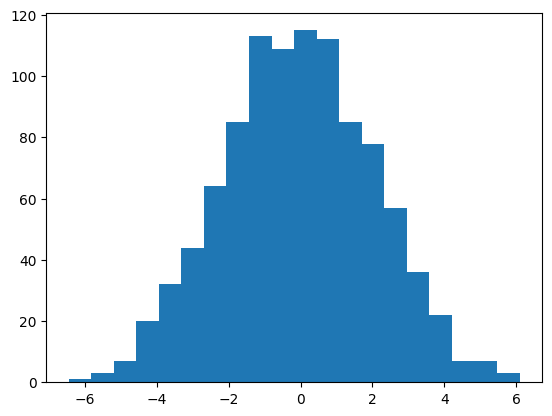

In [35]:
D = uniform.rvs(-1, 2, size = 1000) + norm.rvs(loc=0,scale=2, size = 1000)

print(D)

from matplotlib import pyplot as plt

plt.hist(D, bins = 20)

